In [31]:
import pandas as pd
import numpy as np
#reading the selected dataset
df_b=pd.DataFrame(pd.read_csv("buffalo_covid.csv"))
df_b

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
93289,03/01/2020,Wayne,0,0,0,0,0.00%,COUNTY
93290,03/01/2020,Westchester,0,0,0,0,0.00%,COUNTY
93291,03/01/2020,Western New York,0,0,0,0,0.00%,REGION
93292,03/01/2020,Wyoming,0,0,0,0,0.00%,COUNTY


In [32]:
#printing the main statistics properties of the dataset
print(df_b.describe())

       New Positives  Cumulative Number of Positives  \
count   93294.000000                    9.329400e+04   
mean      216.942183                    1.455524e+05   
std      1437.161409                    5.659282e+05   
min         0.000000                    0.000000e+00   
25%         3.000000                    3.826250e+03   
50%        17.000000                    1.432450e+04   
75%        77.000000                    6.562250e+04   
max     90132.000000                    6.746468e+06   

       Total Number of Tests Performed  Cumulative Number of Tests Performed  
count                     93294.000000                          9.329400e+04  
mean                       4228.687343                          3.081556e+06  
std                       17213.503880                          1.164804e+07  
min                           0.000000                          0.000000e+00  
25%                         116.000000                          1.056058e+05  
50%                  

In [33]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93294 entries, 0 to 93293
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             93294 non-null  object
 1   County                                93294 non-null  object
 2   New Positives                         93294 non-null  int64 
 3   Cumulative Number of Positives        93294 non-null  int64 
 4   Total Number of Tests Performed       93294 non-null  int64 
 5   Cumulative Number of Tests Performed  93294 non-null  int64 
 6   Test % Positive                       93294 non-null  object
 7   Geography                             93294 non-null  object
dtypes: int64(4), object(4)
memory usage: 5.7+ MB


In [34]:
#converting into datatime column
df_b['Test Date'] = pd.to_datetime(df_b['Test Date'], errors='coerce')
#converting percentage column into float values
df_b['Test % Positive'] = df_b['Test % Positive'].replace('%', '', regex=True).astype(float) / 100

In [35]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93294 entries, 0 to 93293
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Test Date                             93294 non-null  datetime64[ns]
 1   County                                93294 non-null  object        
 2   New Positives                         93294 non-null  int64         
 3   Cumulative Number of Positives        93294 non-null  int64         
 4   Total Number of Tests Performed       93294 non-null  int64         
 5   Cumulative Number of Tests Performed  93294 non-null  int64         
 6   Test % Positive                       93294 non-null  float64       
 7   Geography                             93294 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 5.7+ MB


In [36]:
for i in df_b:
    print("the null values in {0} are {1}".format(i, df_b[i].isnull().sum()))

the null values in Test Date are 0
the null values in County are 0
the null values in New Positives are 0
the null values in Cumulative Number of Positives are 0
the null values in Total Number of Tests Performed are 0
the null values in Cumulative Number of Tests Performed are 0
the null values in Test % Positive are 0
the null values in Geography are 0


In [37]:
#imputing the null values in numerical columns using mean
numerical_columns = df_b.select_dtypes(include=[np.number]).columns
print(numerical_columns)
df_b[numerical_columns] = df_b[numerical_columns].fillna(df_b[numerical_columns].mean().round(2))
#imputing the null values in categorical columns using mode
categorical_columns = df_b.select_dtypes(include=[object]).columns
print(categorical_columns)
for i in categorical_columns:
    df_b[i].fillna(df_b[i].mode()[0], inplace=True)
df_b


Index(['New Positives', 'Cumulative Number of Positives',
       'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed', 'Test % Positive'],
      dtype='object')
Index(['County', 'Geography'], dtype='object')


C:\Users\Sai\AppData\Local\Temp\ipykernel_17680\1415970902.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_b[i].fillna(df_b[i].mode()[0], inplace=True)


,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,2023-08-30,Albany,17,80708,103,1473117,0.1099,COUNTY
1,2023-08-30,Allegany,0,11055,1,258396,0.0000,COUNTY
2,2023-08-30,Bronx,142,520477,1099,9553142,0.1246,COUNTY
3,2023-08-30,Broome,33,60508,87,1248106,0.3810,COUNTY
4,2023-08-30,Capital Region,63,292624,356,5538348,0.1647,REGION
...,...,...,...,...,...,...,...,...
93289,2020-03-01,Wayne,0,0,0,0,0.0000,COUNTY
93290,2020-03-01,Westchester,0,0,0,0,0.0000,COUNTY
93291,2020-03-01,Western New York,0,0,0,0,0.0000,REGION
93292,2020-03-01,Wyoming,0,0,0,0,0.0000,COUNTY


In [38]:
for i in df_b:
    print("the null values in {0} are {1}".format(i, df_b[i].isnull().sum()))

the null values in Test Date are 0
the null values in County are 0
the null values in New Positives are 0
the null values in Cumulative Number of Positives are 0
the null values in Total Number of Tests Performed are 0
the null values in Cumulative Number of Tests Performed are 0
the null values in Test % Positive are 0
the null values in Geography are 0


In [39]:
#converting the categorical columns onto codes
categorical_columns = df_b.select_dtypes(include=[object]).columns
for i in categorical_columns: #categorical columns is initialised above
    df_b[i]=df_b[i].str.title()
df_b

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,2023-08-30,Albany,17,80708,103,1473117,0.1099,County
1,2023-08-30,Allegany,0,11055,1,258396,0.0000,County
2,2023-08-30,Bronx,142,520477,1099,9553142,0.1246,County
3,2023-08-30,Broome,33,60508,87,1248106,0.3810,County
4,2023-08-30,Capital Region,63,292624,356,5538348,0.1647,Region
...,...,...,...,...,...,...,...,...
93289,2020-03-01,Wayne,0,0,0,0,0.0000,County
93290,2020-03-01,Westchester,0,0,0,0,0.0000,County
93291,2020-03-01,Western New York,0,0,0,0,0.0000,Region
93292,2020-03-01,Wyoming,0,0,0,0,0.0000,County


In [40]:
#detecting the outliers using InterQuartle Range (IQR) method
for i in numerical_columns: #numerical_columns is already intialized above
    Q1 = df_b[i].quantile(0.25)
    Q2 = df_b[i].quantile(0.75)
    IQR = Q2 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q2 + 1.5 * IQR
    mean = df_b[i].mean().round(2)
    #imputing the outliers using mean
    df_b[i] = np.where((df_b[i] < lower_bound) | (df_b[i] > upper_bound),mean,df_b[i] )

df_b


,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,2023-08-30,Albany,17.0,80708.00,103.0,1473117.00,0.1099,County
1,2023-08-30,Allegany,0.0,11055.00,1.0,258396.00,0.0000,County
2,2023-08-30,Bronx,142.0,145552.44,1099.0,3081555.99,0.1246,County
3,2023-08-30,Broome,33.0,60508.00,87.0,1248106.00,0.0600,County
4,2023-08-30,Capital Region,63.0,145552.44,356.0,3081555.99,0.1647,Region
...,...,...,...,...,...,...,...,...
93289,2020-03-01,Wayne,0.0,0.00,0.0,0.00,0.0000,County
93290,2020-03-01,Westchester,0.0,0.00,0.0,0.00,0.0000,County
93291,2020-03-01,Western New York,0.0,0.00,0.0,0.00,0.0000,Region
93292,2020-03-01,Wyoming,0.0,0.00,0.0,0.00,0.0000,County


Text(0.5, 1.0, 'Correlation Matrix')

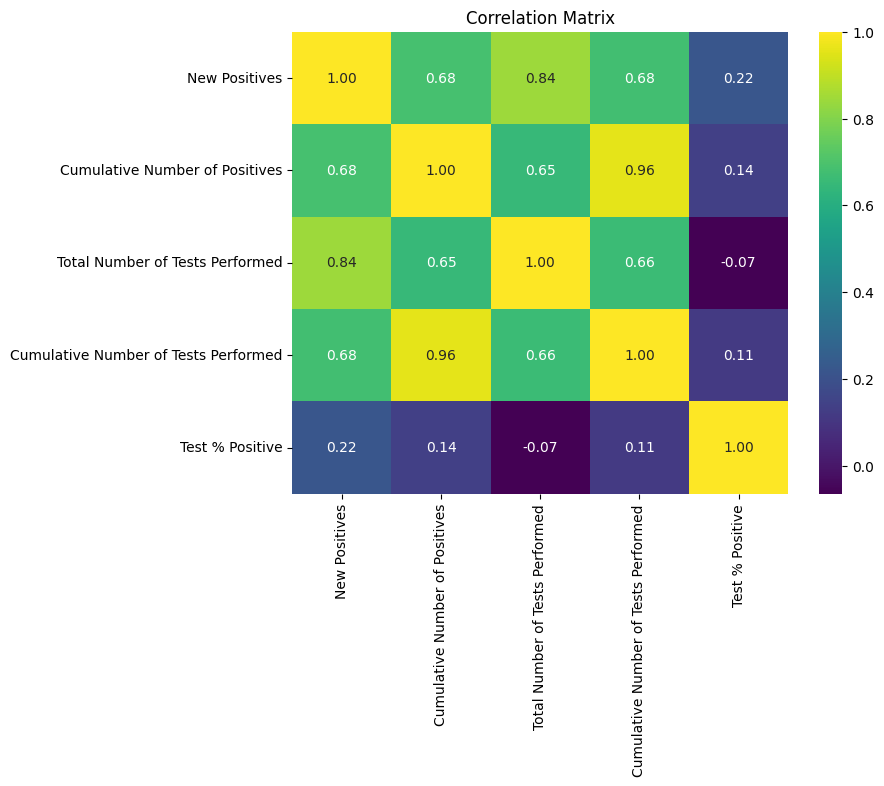

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
#Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix= df_b.corr(numeric_only=True)  # Including only numeric columns for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')



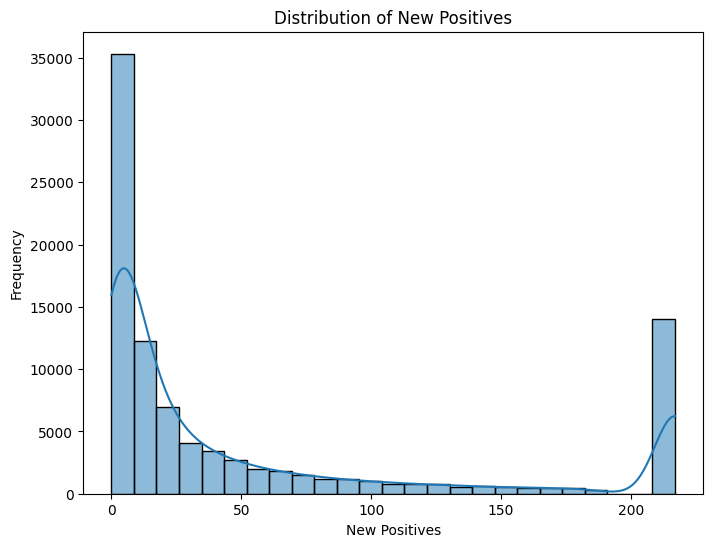

In [47]:
#Histplot
plt.figure(figsize=(8,6))
sns.histplot(df_b['New Positives'], kde=True, bins=25)
plt.title('Distribution of New Positives')
plt.xlabel('New Positives')
plt.ylabel('Frequency')
plt.show()

C:\Users\Sai\AppData\Local\Temp\ipykernel_17680\3127692406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=df_b, palette='Set2')


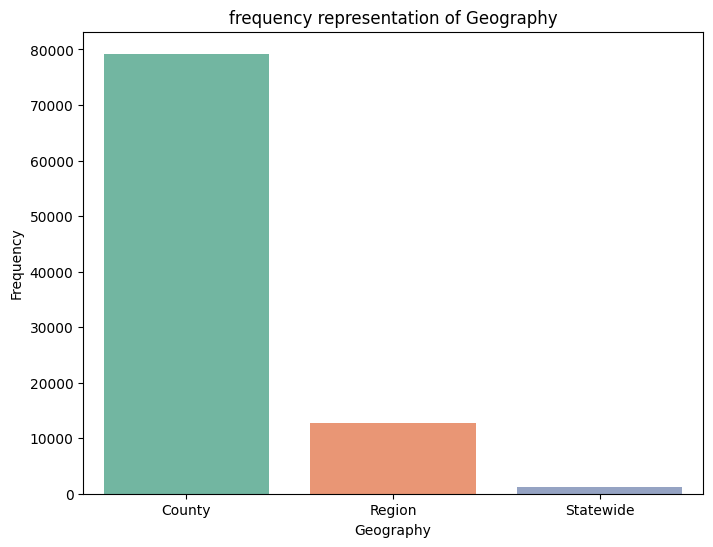

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='Geography', data=df_b, palette='Set2')
plt.title('frequency representation of Geography')
plt.xlabel('Geography')
plt.ylabel('Frequency')
plt.show()

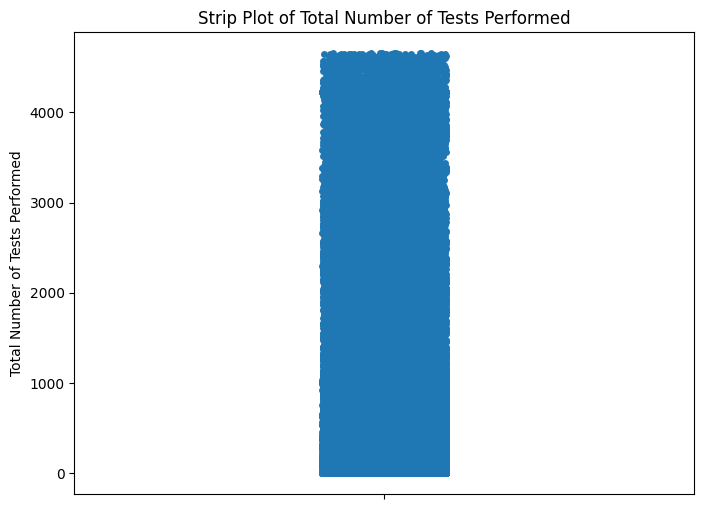

In [70]:
#stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_b, y='Total Number of Tests Performed', jitter=True)
plt.title('Strip Plot of Total Number of Tests Performed')
plt.ylabel('Total Number of Tests Performed')
plt.show()

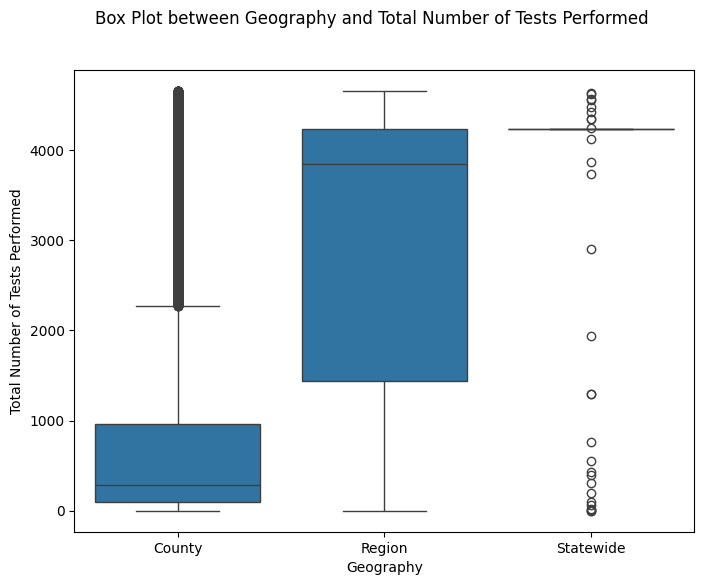

In [59]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df_b, x='Geography', y='Total Number of Tests Performed')
plt.suptitle('Box Plot between Geography and Total Number of Tests Performed ')
plt.show()

In [60]:
##generating codes for Categorical columns using pd.Categorical methods
for i in categorical_columns:
    df_b[f'{i}_numeric'] = pd.Categorical(df_b[i]).codes
correlation_matrix = df_b.corr(numeric_only=True)


In [61]:
df_b

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography,County_numeric,Geography_numeric
0,2023-08-30,Albany,17.0,80708.00,103.0,1473117.00,0.1099,County,0,0
1,2023-08-30,Allegany,0.0,11055.00,1.0,258396.00,0.0000,County,1,0
2,2023-08-30,Bronx,142.0,145552.44,1099.0,3081555.99,0.1246,County,2,0
3,2023-08-30,Broome,33.0,60508.00,87.0,1248106.00,0.0600,County,3,0
4,2023-08-30,Capital Region,63.0,145552.44,356.0,3081555.99,0.1647,Region,4,1
...,...,...,...,...,...,...,...,...,...,...
93289,2020-03-01,Wayne,0.0,0.00,0.0,0.00,0.0000,County,68,0
93290,2020-03-01,Westchester,0.0,0.00,0.0,0.00,0.0000,County,69,0
93291,2020-03-01,Western New York,0.0,0.00,0.0,0.00,0.0000,Region,70,1
93292,2020-03-01,Wyoming,0.0,0.00,0.0,0.00,0.0000,County,71,0


In [62]:
#Building the correlation matrix using corr method by considering "county_numeric" as the target
correlation_with_target = correlation_matrix['County_numeric'].drop('County_numeric')
low_correlation_features= correlation_with_target[abs(correlation_with_target)<0.01].index
print(correlation_with_target)
print(low_correlation_features)
df_b=df_b.drop(columns=low_correlation_features) 
df_b

New Positives                           0.022987
Cumulative Number of Positives          0.023447
Total Number of Tests Performed         0.031230
Cumulative Number of Tests Performed    0.044242
Test % Positive                        -0.026796
Geography_numeric                       0.016016
Name: County_numeric, dtype: float64
Index([], dtype='object')


,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography,County_numeric,Geography_numeric
0,2023-08-30,Albany,17.0,80708.00,103.0,1473117.00,0.1099,County,0,0
1,2023-08-30,Allegany,0.0,11055.00,1.0,258396.00,0.0000,County,1,0
2,2023-08-30,Bronx,142.0,145552.44,1099.0,3081555.99,0.1246,County,2,0
3,2023-08-30,Broome,33.0,60508.00,87.0,1248106.00,0.0600,County,3,0
4,2023-08-30,Capital Region,63.0,145552.44,356.0,3081555.99,0.1647,Region,4,1
...,...,...,...,...,...,...,...,...,...,...
93289,2020-03-01,Wayne,0.0,0.00,0.0,0.00,0.0000,County,68,0
93290,2020-03-01,Westchester,0.0,0.00,0.0,0.00,0.0000,County,69,0
93291,2020-03-01,Western New York,0.0,0.00,0.0,0.00,0.0000,Region,70,1
93292,2020-03-01,Wyoming,0.0,0.00,0.0,0.00,0.0000,County,71,0


In [63]:
print(len(df_b['County'].unique()))
print(len(df_b['Geography'].unique()))

73
3


In [64]:
for i in categorical_columns:
    df_b= pd.get_dummies(df_b, columns=[i], dtype=int)
df_b

,Test Date,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,County_numeric,Geography_numeric,County_Albany,County_Allegany,...,County_Warren,County_Washington,County_Wayne,County_Westchester,County_Western New York,County_Wyoming,County_Yates,Geography_County,Geography_Region,Geography_Statewide
0,2023-08-30,17.0,80708.00,103.0,1473117.00,0.1099,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2023-08-30,0.0,11055.00,1.0,258396.00,0.0000,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2023-08-30,142.0,145552.44,1099.0,3081555.99,0.1246,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2023-08-30,33.0,60508.00,87.0,1248106.00,0.0600,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2023-08-30,63.0,145552.44,356.0,3081555.99,0.1647,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93289,2020-03-01,0.0,0.00,0.0,0.00,0.0000,68,0,0,0,...,0,0,1,0,0,0,0,1,0,0
93290,2020-03-01,0.0,0.00,0.0,0.00,0.0000,69,0,0,0,...,0,0,0,1,0,0,0,1,0,0
93291,2020-03-01,0.0,0.00,0.0,0.00,0.0000,70,1,0,0,...,0,0,0,0,1,0,0,0,1,0
93292,2020-03-01,0.0,0.00,0.0,0.00,0.0000,71,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [65]:
for i in numerical_columns:
    min_val = df_b[i].min()
    max_val = df_b[i].max()
    df_b[f'{i}_normalised'] = (df_b[i] - min_val) / (max_val - min_val)
df_b


,Test Date,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,County_numeric,Geography_numeric,County_Albany,County_Allegany,...,County_Wyoming,County_Yates,Geography_County,Geography_Region,Geography_Statewide,New Positives_normalised,Cumulative Number of Positives_normalised,Total Number of Tests Performed_normalised,Cumulative Number of Tests Performed_normalised,Test % Positive_normalised
0,2023-08-30,17.0,80708.00,103.0,1473117.00,0.1099,0,0,1,0,...,0,0,1,0,0,0.078363,0.509977,0.022117,0.393756,0.608864
1,2023-08-30,0.0,11055.00,1.0,258396.00,0.0000,1,0,0,1,...,0,0,1,0,0,0.000000,0.069854,0.000215,0.069068,0.000000
2,2023-08-30,142.0,145552.44,1099.0,3081555.99,0.1246,2,0,0,0,...,0,0,1,0,0,0.654559,0.919716,0.235989,0.823684,0.690305
3,2023-08-30,33.0,60508.00,87.0,1248106.00,0.0600,3,0,0,0,...,0,0,1,0,0,0.152116,0.382338,0.018682,0.333612,0.332410
4,2023-08-30,63.0,145552.44,356.0,3081555.99,0.1647,4,1,0,0,...,0,0,0,1,0,0.290403,0.919716,0.076444,0.823684,0.912465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93289,2020-03-01,0.0,0.00,0.0,0.00,0.0000,68,0,0,0,...,0,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
93290,2020-03-01,0.0,0.00,0.0,0.00,0.0000,69,0,0,0,...,0,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
93291,2020-03-01,0.0,0.00,0.0,0.00,0.0000,70,1,0,0,...,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
93292,2020-03-01,0.0,0.00,0.0,0.00,0.0000,71,0,0,0,...,1,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
df_b2=df_b
df_b2.to_csv('covid_buffalo_preprocessed.csv', index=False)